In [20]:
import numpy as np
import io
import sys
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
n_path = 'Examples/australia/uplight_modelsrun/realtime_data/'
o_path = 'Examples/australia/uplight_modelsrun/realtime_data/'

In [22]:
elev = pickle.load(open("%s/0/pred_elev_vec.pkl"%(n_path), "rb" ) )
erdp = pickle.load(open("%s/0/pred_erodep_vec.pkl"%(n_path), "rb" ) )

In [23]:
print(elev.keys())
print(elev[0.0])
print(elev[0.0].shape)

[-149000000.0, -140000000.0, -125000000.0, -115000000.0, -100000000.0, -75000000.0, -50000000.0, -40000000.0, -30000000.0, -25000000.0, -5000000.0, 0.0]
[[-4609.52178105 -4610.83048135 -4704.30648052 ... -4362.73477556
  -4343.87113123 -4343.61029682]
 [-4609.32726812 -4611.0780381  -4704.44755687 ... -4362.70795662
  -4344.36004197 -4343.95692331]
 [-4596.05282234 -4595.87259024 -4665.85601836 ... -4381.45516767
  -4366.8748879  -4366.90575367]
 ...
 [-5469.07834304 -5469.00039639 -5463.19271919 ... -4309.66094784
  -4274.66329315 -4274.74318839]
 [-5463.60527038 -5463.41425368 -5457.36405521 ... -4309.16019404
  -4272.46436513 -4271.79925683]
 [-5463.52389331 -5463.43992116 -5457.48165945 ... -4309.12242103
  -4272.26796146 -4271.75708132]]
(129, 141)


In [24]:
print(erdp.keys())
print(erdp[0.0])
print(erdp[0.0].shape)

[-149000000.0, -140000000.0, -125000000.0, -115000000.0, -100000000.0, -75000000.0, -50000000.0, -40000000.0, -30000000.0, -25000000.0, -5000000.0, 0.0]
[[ 0.00000000e+00 -2.89444103e-02 -4.71389166e-01 ...  5.16315913e-01
   2.24663148e-01  0.00000000e+00]
 [-3.15738639e-02 -2.26890767e+00 -1.70864509e+01 ...  1.85788996e+01
   1.62935751e+01  2.45072660e-01]
 [ 1.27296330e-01  5.21019367e+00 -1.24436271e+00 ...  2.06285591e+01
   1.81609454e+01  5.49705857e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00 -1.01043170e-03 ... -1.29948061e-03
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(129, 141)


In [30]:
# plt.figure(figsize=(10,5))
# sns.heatmap(erdp[0.0])

In [31]:
# plt.figure(figsize=(10,5))
# sns.heatmap(elev[0.0])

('residual shape', (129, 141))


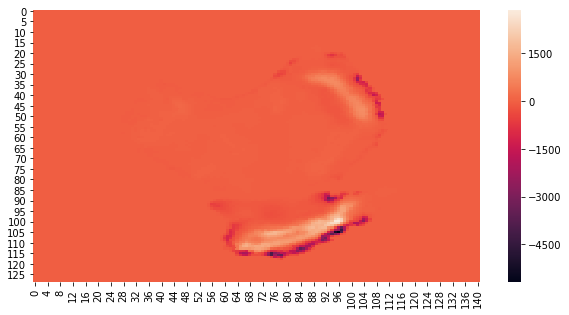

In [34]:
residual = erdp[-5000000.0] - erdp[0.0]
# print('residual shape', residual.shape)
plt.figure(figsize=(10,5))
sns.heatmap(residual)